In [1]:
import random
from IPython.display import clear_output

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.base import BaseEstimator,TransformerMixin

In [2]:
data=pd.read_csv("files/Train_Dataset.csv",low_memory=False)
data_description=pd.read_csv("files/Data_Dictionary.csv")

In [3]:
data_description

,Variable,Description
0,ID,Client Loan application ID
1,Client_Income,Client Income in $
2,Car_Owned,Any Car owned by client before applying for th...
3,Bike_Owned,Any bike owned by client (0 means No and 1 mea...
4,Active_Loan,Any other active loan at the time of aplicatio...
5,House_Own,Any house owned by client (0 means No and 1 me...
6,Child_Count,Number of children the client has
7,Credit_Amount,Credit amount of the loan in $
8,Loan_Annuity,Loan annuity in $
9,Accompany_Client,Who accompanied the client when client applied...


In [4]:
data.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655054,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631354537,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355638717,0.2021,674.0,1.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [6]:
data.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

* As you can see above output there are many null values which we need to remove from the dataset or we will replace it with its relevant values.
* Some will will be removed.
* Some will be replaced with zero.
* Some will be replaced with its mean.

<AxesSubplot: >

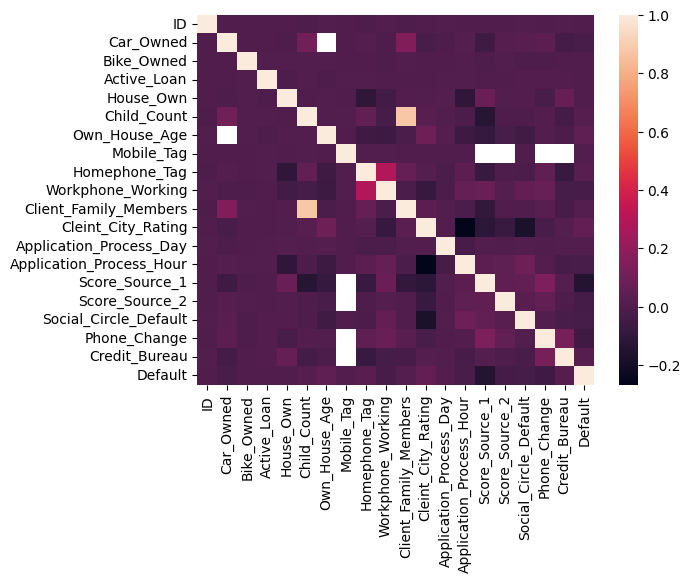

In [7]:
sns.heatmap(data.corr(numeric_only=True))

In [8]:
for column in data.columns:
    for value in data[column].unique():
        try:
            float(value)
        except:
            print(value)

$
$
$
#VALUE!
Alone
Relative
Others
Kids
Partner
##
Group
Commercial
Service
Retired
Govt Job
Student
Unemployed
Maternity leave
Businessman
Secondary
Graduation
Graduation dropout
Junior secondary
Post Grad
M
W
S
D
Male
Female
XNA
CL
RL
Home
Family
Office
Municipal
Rental
Shared
@
#
x
x
x
x
Sales
Realty agents
Laborers
Core
Drivers
Managers
Accountants
High skill tech
Cleaning
HR
Waiters/barmen
Low-skill Laborers
Medicine
Cooking
Private service
Security
IT
Secretaries
Yes
No
Yes
No
Self-employed
Government
XNA
Business Entity Type 3
Other
Industry: type 3
Business Entity Type 2
Business Entity Type 1
Transport: type 4
Construction
Kindergarten
Trade: type 3
Industry: type 2
Trade: type 7
Trade: type 2
Agriculture
Military
Medicine
Housing
Industry: type 1
Industry: type 11
Bank
School
Industry: type 9
Postal
University
Transport: type 2
Restaurant
Electricity
Police
Industry: type 4
Security Ministries
Services
Transport: type 3
Mobile
Hotel
Security
Industry: type 7
Advertising
Clea

* You can see above there are so many unwanted values in the dataset which we need to remove from the dataset
* These unwanted values are causing the columns which should be float and are in object. 

# Data Cleaning Process:
* Find the unwanted characters in data.
* Remove or replace the unwanted characters in data.
* Impute None values to 0 for some suitable columns.
*       ["Car_Owned", "Bike_Owned", "Active_Loan", "House_Own","Child_Count", "Client_Family_Members", "Social_Circle_Default", "Phone_Change", "ID_Days","Score_Source_1","Score_Source_2","Score_Source_3"]
* Impute None Values to Mean for some suitable columns.
*       ["Client_Income", "Population_Region_Relative", "Employed_Days"]
* Create a new column of "Average_Score" by combining the values of three Score columns i.e, "Score_Source_1", "Score_Source_2" and "Score_Source_3".
* Drop All the rest None Values.
* Drop all the unnecessary columns

In [9]:
def find_impurities(X):
    error_characters=[]
    for column in X.columns:
        if X[column].dtype==object:
            grouped_data=X.groupby(by=[column]).count().sort_values(by=["ID"],ascending=True)[["ID"]]
            for unique_col in sorted(grouped_data.T.columns):
                try:
                    float(unique_col)
                except:
                    if grouped_data.T[unique_col].values[0]<20:
                        if len(unique_col)<8:
                            error_characters.append(unique_col)
    error_characters.remove("Student")
    return error_characters

In [10]:
impure_chars=find_impurities(data)

In [11]:
class RemoveImpurities(BaseEstimator,TransformerMixin):
    def __init__(self,impurities) -> None:
        self.impurities=impurities
    
    def remove_impurities(self,num):
        try:
            return float(num)
        except:
            if num in self.impurities:
                return np.nan 
            else:
                return num
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        for column in X.columns:
            X[column]=X[column].map(self.remove_impurities)
        return X

In [12]:
class ImputeZero(BaseEstimator,TransformerMixin):
    replace_with_zero_columns = ["Car_Owned", "Bike_Owned", "Active_Loan", "House_Own",
                               "Child_Count", "Client_Family_Members", "Social_Circle_Default", "Phone_Change", "ID_Days","Score_Source_1","Score_Source_2","Score_Source_3"]
    
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        imputer=SimpleImputer(strategy="constant",fill_value=0)
        X[self.replace_with_zero_columns]=imputer.fit_transform(X[self.replace_with_zero_columns])
        return X

In [13]:
class ImputeMean(BaseEstimator,TransformerMixin):
    replace_with_mean_columns = ["Client_Income",
                             "Population_Region_Relative", "Employed_Days"]
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        imputer=SimpleImputer(strategy="mean")
        X[self.replace_with_mean_columns]=imputer.fit_transform(X[self.replace_with_mean_columns])
        return X


In [14]:
class CreateColumns(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X["Average_Score"]=(X["Score_Source_1"]+X["Score_Source_2"]+X["Score_Source_3"])/3
        return X
        

In [15]:
class DropNone(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X.dropna(axis=0,subset=["Credit_Amount","Client_Income_Type","Client_Education","Client_Housing_Type","Loan_Contract_Type","Loan_Annuity","Age_Days","Employed_Days"])

In [16]:
class DropColumns(BaseEstimator,TransformerMixin):
    dropping_columns = ["ID","Client_Gender", "Client_Marital_Status", "Own_House_Age", "Credit_Bureau", "Type_Organization", "Cleint_City_Rating",
                    "Client_Occupation", "Accompany_Client", "Registration_Days", "Application_Process_Day", "Application_Process_Hour","Score_Source_1","Score_Source_2","Score_Source_3"]
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X.drop(self.dropping_columns,axis=1)

In [17]:
from sklearn.pipeline import Pipeline

In [18]:
pipeline=Pipeline([
    ("RemoveImpurities",RemoveImpurities(impure_chars)),
    ("ImputeZero",ImputeZero()),
    ("ImputeMean",ImputeMean()),
    ("CreateColumns",CreateColumns()),
    ("DropNone",DropNone()),
    ("DropColumns",DropColumns())
    
])

In [19]:
data=pipeline.fit_transform(data)

In [20]:
data.isna().sum()

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Client_Income_Type            0
Client_Education              0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
ID_Days                       0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Family_Members         0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Social_Circle_Default         0
Phone_Change                  0
Default                       0
Average_Score                 0
dtype: int64

# Visualising the Dataset
    Here I am creating a function which will plot all the data.
* Categorical Valriables will be plotted as Pie Chart if Unique Values are less than or equal to 5 .
* Categorical Valriables will be plotted as hist Chart if Unique Values are greater than 5 .
* Numerical Variables will be plotted as scatter plot.

In [21]:
data=data.sort_values(by=["Client_Income"])

In [22]:
def plot_data(data)->None:
    columns=data.columns
    def pairs(a,b):
        for i in range(a):
            for j in range(b):
                yield [i,j]
    ncol=int(columns.shape[0]**0.5)
    nrow=int(columns.shape[0]**0.5)
    color=["orange","green","limegreen","cyan","grey"]
    while nrow*ncol<len(data.columns):
        nrow+=1
    print(nrow,ncol)
    fig,ax=plt.subplots(nrow,ncol,figsize=(2.5*nrow,2.5*nrow))
    rc=pairs(nrow,ncol)
    processed=0
    for i in columns:
        arr=rc.__next__()
        try:
            dt=float(data[i][0])
        except:
            dt=data[i][0]
        print(f"working with {i}")
        if isinstance(dt,float):
            # print("true")
            ax[arr[0],arr[1]].scatter(np.arange(0,len(data[i])),data[i],label=i,c=random.choice(color))
            ax[arr[0],arr[1]].legend(loc="best")
            ax[arr[0],arr[1]].set_title(str(i))
        else:
            count=data.groupby(by=i).count()
            label=sorted(data[i].unique())
            if len(count.index)<5:
                ax[arr[0],arr[1]].pie(np.hstack(count.iloc[:,0:1].values),labels=label,autopct="%1.1f%%")
                # ax[arr[0],arr[1]].legend(loc="best")
                ax[arr[0],arr[1]].set_title(str(i))
                
            else:
                ax[arr[0],arr[1]].hist(data[i],color=random.choice(color),)
                ax[arr[0],arr[1]].set_title(str(i))
                ax[arr[0],arr[1]].set_xticklabels(data[i].unique(),rotation=45)            
                
        clear_output()
        processed+=100/len(columns)
        if processed==float(100):
            print(f"processing graph...... {processed:.2f} % completed") 
        else:
            print(f"{processed:.2f} % completed") 
            
    plt.tight_layout(pad=1)
    plt.show()
    

100.00 % completed


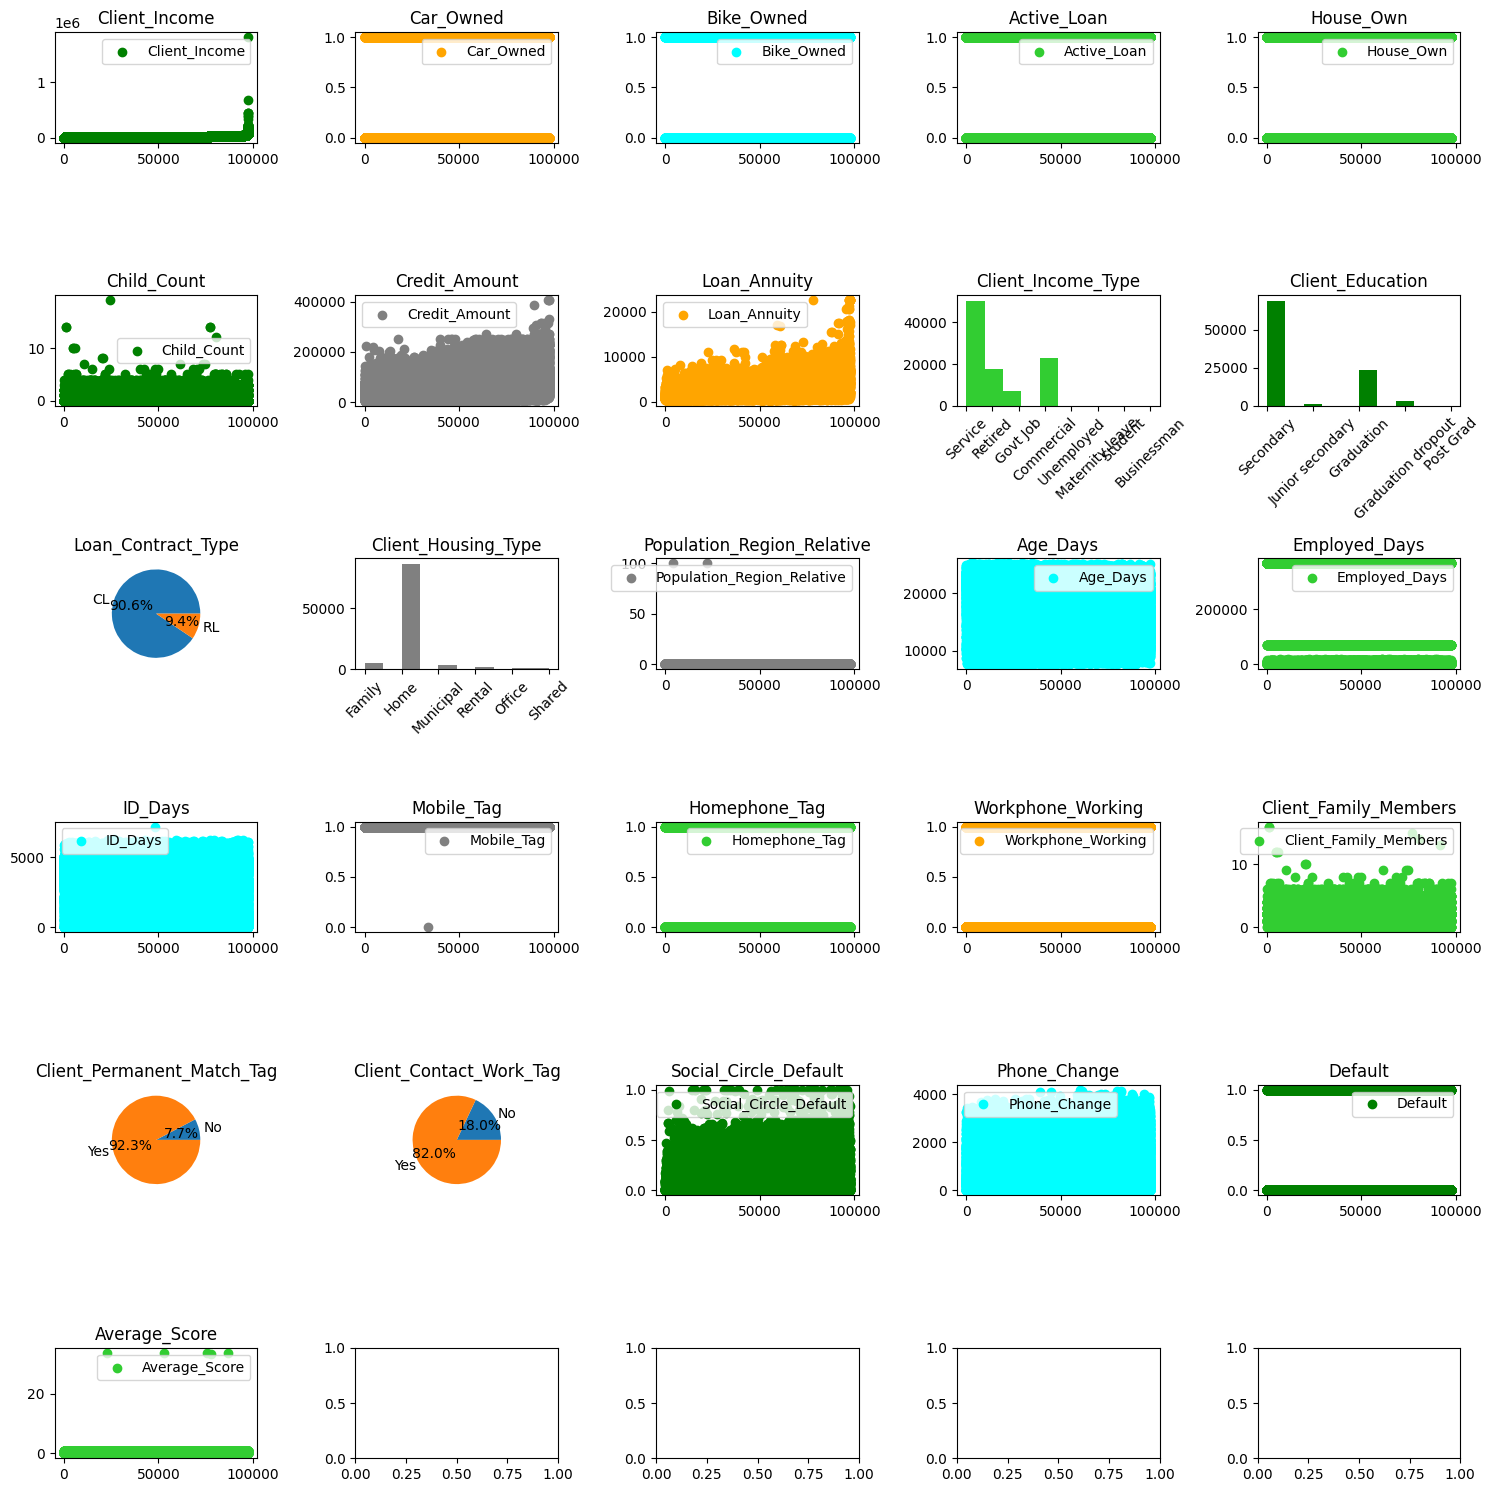

In [23]:
plot_data(data)

In [24]:
data.describe()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,ID_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Social_Circle_Default,Phone_Change,Default,Average_Score
count,9.754400e+04,97544.000000,97544.000000,97544.000000,97544.000000,97544.000000,97544.000000,97544.000000,97544.000000,97544.000000,97544.000000,97544.000000,97544.000000,97544.000000,97544.000000,97544.000000,97544.000000,97544.000000,97544.000000,97544.000000
mean,1.688152e+04,0.333173,0.322439,0.483525,0.671256,0.404884,60080.693484,2720.804625,0.022978,16028.138399,67139.349365,2838.634268,0.999990,0.200361,0.281186,2.112411,0.057892,935.593189,0.080620,0.370193
std,1.179893e+04,0.471350,0.467412,0.499731,0.469759,0.722070,40441.244852,1465.370789,0.452915,4364.486152,136875.151504,1607.802092,0.003202,0.400272,0.449580,0.952004,0.095908,832.684058,0.272252,0.285958
min,2.565000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4500.000000,217.350000,0.000533,7676.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.125000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,27000.000000,1657.350000,0.010032,12398.000000,961.000000,1443.000000,1.000000,0.000000,0.000000,2.000000,0.000000,226.000000,0.000000,0.249640
50%,1.575000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,51477.750000,2498.400000,0.019101,15744.000000,2317.000000,3084.000000,1.000000,0.000000,0.000000,2.000000,0.000000,725.000000,0.000000,0.369717
75%,2.025000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,80865.000000,3459.600000,0.026392,19655.000000,6819.250000,4259.000000,1.000000,0.000000,1.000000,3.000000,0.086600,1552.000000,0.000000,0.469746
max,1.800009e+06,1.000000,1.000000,1.000000,1.000000,19.000000,405000.000000,22500.000000,100.000000,25201.000000,365243.000000,7197.000000,1.000000,1.000000,1.000000,16.000000,1.000000,4185.000000,1.000000,33.766283


<AxesSubplot: >

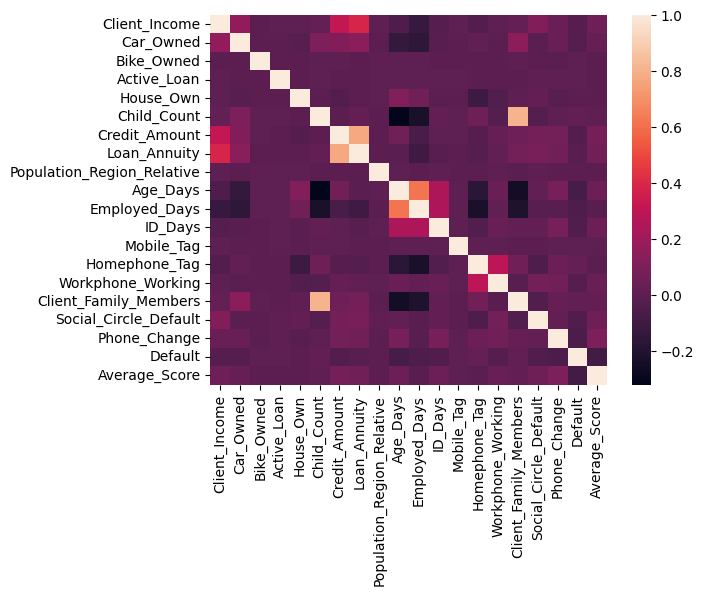

In [25]:
sns.heatmap(data.corr(numeric_only=True))

In [26]:
categorical_feature=[column for column in data.columns if data[column].dtype==object]
encoding_directory: dict={
    
}

for column in categorical_feature:
    encoding_directory[column]={}
    for index,value in enumerate(data[column].unique()):
        encoding_directory[column][index]=value

In [27]:
class LabelEncoding(BaseEstimator,TransformerMixin):
    
    def __init__(self,directory) -> None:
        self.directory=directory

    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        for column, values in self.directory.items():
            for idx,unique_values in values.items():
                X[column]=X[column].replace(unique_values,idx)
                X[column]=X[column].replace(unique_values.lower(),idx)
                X[column]=X[column].replace(unique_values.upper(),idx)
                X[column]=X[column].replace(unique_values.capitalize(),idx)
        return X

In [28]:
encode_labels=LabelEncoding(encoding_directory)

encode_labels.fit_transform(data)

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,...,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Social_Circle_Default,Phone_Change,Default,Average_Score
65490,2565.0,0.0,0.0,1.0,0.0,0.0,15814.80,580.95,0,0,...,1.0,0.0,0.0,1.0,0,0,0.0825,0.0,0.0,0.095299
38878,2610.0,0.0,0.0,0.0,0.0,0.0,5400.00,539.10,1,0,...,1.0,0.0,0.0,1.0,0,0,0.0000,2101.0,0.0,0.200221
58824,2646.0,0.0,0.0,1.0,1.0,0.0,10188.00,676.35,1,1,...,1.0,0.0,0.0,2.0,0,0,0.0000,271.0,0.0,0.037569
8321,2700.0,0.0,0.0,1.0,0.0,1.0,90000.00,2631.60,0,2,...,1.0,1.0,0.0,3.0,0,0,0.0247,828.0,0.0,0.648303
85395,2700.0,1.0,1.0,1.0,0.0,0.0,76022.55,3233.70,1,0,...,1.0,0.0,0.0,2.0,0,0,0.0000,621.0,0.0,0.440494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48942,450000.0,1.0,0.0,1.0,1.0,0.0,225000.00,22500.00,0,2,...,1.0,0.0,1.0,1.0,0,0,0.0670,529.0,0.0,0.291486
13867,450000.0,0.0,1.0,0.0,0.0,0.0,83538.00,4265.10,0,0,...,1.0,1.0,0.0,2.0,1,0,0.0000,613.0,0.0,0.343690
106150,450000.0,0.0,1.0,1.0,0.0,0.0,45000.00,4774.95,0,2,...,1.0,0.0,1.0,1.0,0,0,0.1608,3206.0,0.0,0.424200
117968,675000.0,1.0,0.0,0.0,0.0,0.0,79083.00,5297.85,0,2,...,1.0,1.0,1.0,2.0,0,1,0.0000,695.0,0.0,0.349501


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97544 entries, 65490 to 12854
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client_Income               97544 non-null  float64
 1   Car_Owned                   97544 non-null  float64
 2   Bike_Owned                  97544 non-null  float64
 3   Active_Loan                 97544 non-null  float64
 4   House_Own                   97544 non-null  float64
 5   Child_Count                 97544 non-null  float64
 6   Credit_Amount               97544 non-null  float64
 7   Loan_Annuity                97544 non-null  float64
 8   Client_Income_Type          97544 non-null  int64  
 9   Client_Education            97544 non-null  int64  
 10  Loan_Contract_Type          97544 non-null  int64  
 11  Client_Housing_Type         97544 non-null  int64  
 12  Population_Region_Relative  97544 non-null  float64
 13  Age_Days                   

In [30]:
def plot_boxes(data) -> None:
    columns=[column for column in data.columns if data[column].dtype==int or data[column].dtype==float]
    plt.rcParams['axes.grid']=True
    plt.rcParams['axes.grid']=True
    def pairs(a,b):
        for i in range(a):
            for j in range(b):
                yield [i,j]
    ncol=int(len(columns)**0.5)
    nrow=int(len(columns)**0.5)
    color=["orange","green","limegreen","cyan","grey"]
    while nrow*ncol<len(data.columns):
        nrow+=1
    print(nrow,ncol)
    fig,ax=plt.subplots(nrow,ncol,figsize=(2.5*nrow,2.5*nrow))
    rc=pairs(nrow,ncol)
    processed=0
    for i in columns:
        arr=rc.__next__()
        ax[arr[0],arr[1]].boxplot(data[i],vert=False)
        ax[arr[0],arr[1]].set_title(str(i))
        labels=ax[arr[0],arr[1]].get_xticklabels()
        for tick in labels:
            tick.set_rotation(45)
        
    plt.tight_layout()
    plt.show()
    

7 4


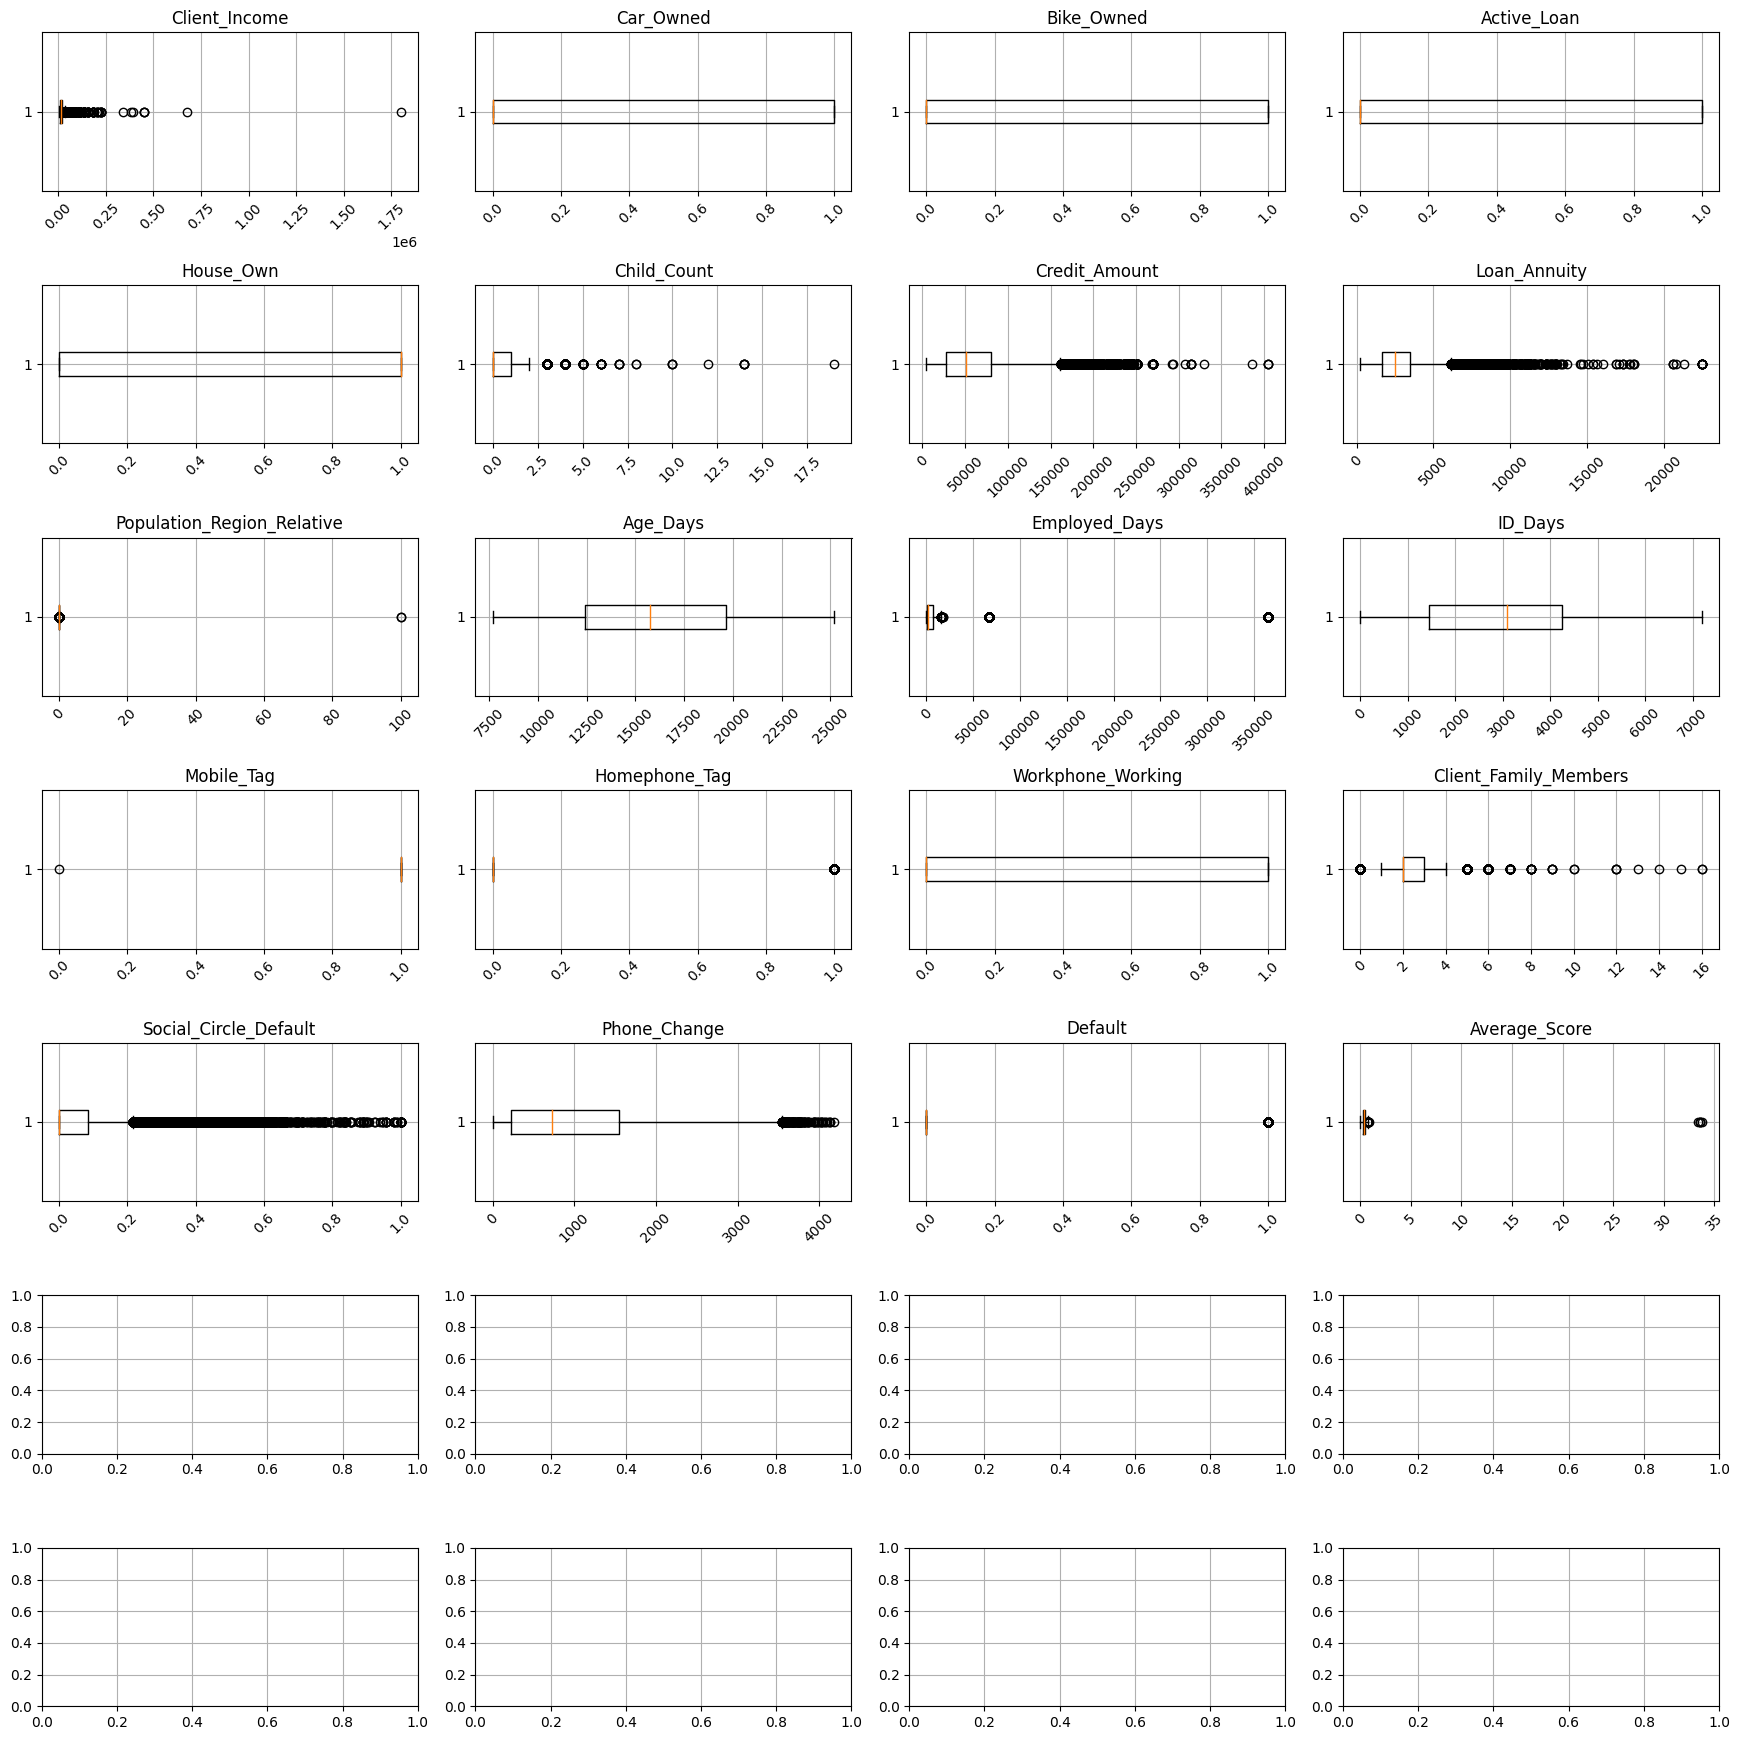

In [31]:
plot_boxes(data)

* We need to rmove the outliers from the dataset for better results.
* We will remove outliers of only features which contains the values other than 0 and 1.
* columns which needs to remove outliers:
*        Loan_Annuity < 10000
*        Employed_Days < 100000
*        Client_Family_Members <= 10
*        Phone_Change < 3000
*        Child_Count < 5
*        Average_Score <= 1

In [32]:
class RemoveOutliers(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X=X[X["Loan_Annuity"]<10000]
        X=X[X["Employed_Days"]<100000]
        X=X[X["Client_Family_Members"]<10]
        X=X[X["Phone_Change"]<3000]
        X=X[X["Child_Count"]<5]
        X=X[X["Average_Score"]<1]
        return X

In [33]:
remove_outlier=RemoveOutliers()

remove_outlier.fit_transform(data)

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,...,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Social_Circle_Default,Phone_Change,Default,Average_Score
65490,2565.00,0.0,0.0,1.0,0.0,0.0,15814.8,580.95,0,0,...,1.0,0.0,0.0,1.0,0,0,0.0825,0.0,0.0,0.095299
8321,2700.00,0.0,0.0,1.0,0.0,1.0,90000.0,2631.60,0,2,...,1.0,1.0,0.0,3.0,0,0,0.0247,828.0,0.0,0.648303
61408,2700.00,0.0,0.0,0.0,1.0,1.0,45000.0,2201.85,2,0,...,1.0,1.0,1.0,3.0,0,0,0.0000,1082.0,0.0,0.456289
71097,2700.00,0.0,0.0,1.0,1.0,0.0,9594.0,1020.15,0,0,...,1.0,1.0,0.0,2.0,0,1,0.0000,3.0,0.0,0.345493
109685,2700.00,0.0,0.0,0.0,0.0,0.0,22500.0,953.10,2,0,...,1.0,0.0,0.0,2.0,1,0,0.0000,1540.0,0.0,0.443147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50358,337500.00,0.0,0.0,0.0,1.0,1.0,90000.0,4080.15,0,2,...,1.0,0.0,1.0,0.0,0,1,0.2021,321.0,0.0,0.248780
101822,395005.95,1.0,0.0,0.0,1.0,1.0,67500.0,6621.75,3,2,...,1.0,1.0,1.0,3.0,0,0,0.0464,902.0,0.0,0.442916
13867,450000.00,0.0,1.0,0.0,0.0,0.0,83538.0,4265.10,0,0,...,1.0,1.0,0.0,2.0,1,0,0.0000,613.0,0.0,0.343690
117968,675000.00,1.0,0.0,0.0,0.0,0.0,79083.0,5297.85,0,2,...,1.0,1.0,1.0,2.0,0,1,0.0000,695.0,0.0,0.349501


In [34]:
def spilt_input_output(data)-> tuple:
    X=data[[column for column in data.columns if column!="Default"]]
    y=data["Default"].values
    return X,y

In [35]:
X,y=spilt_input_output(data)

In [36]:
class Scaler(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        ssc=StandardScaler()
        for column in X.columns:
            X[column]=ssc.fit_transform(X[column].values.reshape(X.shape[0],-1))
        return X
    


In [48]:
scaler=Scaler()

scaler.fit_transform(X)

C:\Users\ravin\AppData\Local\Temp\ipykernel_5836\3786117016.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column]=ssc.fit_transform(X[column].values.reshape(X.shape[0],-1))
C:\Users\ravin\AppData\Local\Temp\ipykernel_5836\3786117016.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column]=ssc.fit_transform(X[column].values.reshape(X.shape[0],-1))
C:\Users\ravin\AppData\Local\Temp\ipykernel_5836\3786117016.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,...,ID_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Social_Circle_Default,Phone_Change,Average_Score
65490,-1.213381,-0.706851,-0.689842,1.033510,-1.428944,-0.560729,-1.094579,-1.460290,-0.827716,-0.622999,...,-1.763680,0.003202,-0.500564,-0.625444,-1.168499,-0.288980,-0.468018,0.256581,-1.123593,-0.961312
38878,-1.209567,-0.706851,-0.689842,-0.967576,-1.428944,-0.560729,-1.352109,-1.488849,-0.018557,-0.622999,...,1.235460,0.003202,-0.500564,-0.625444,-1.168499,-0.288980,-0.468018,-0.603623,1.399586,-0.594396
58824,-1.206516,-0.706851,-0.689842,1.033510,0.699817,-0.560729,-1.233714,-1.395186,-0.018557,0.410765,...,-0.181388,0.003202,-0.500564,-0.625444,-0.118079,-0.288980,-0.468018,-0.603623,-0.798138,-1.163196
8321,-1.201939,-0.706851,-0.689842,1.033510,-1.428944,0.824184,0.739825,-0.060875,-0.827716,1.444530,...,0.106584,0.003202,1.997747,-0.625444,0.932342,-0.288980,-0.468018,-0.346083,-0.129213,0.972561
85395,-1.201939,1.414725,1.449607,1.033510,-1.428944,-0.560729,0.394200,0.350012,-0.018557,-0.622999,...,0.902084,0.003202,-0.500564,-0.625444,-0.118079,-0.288980,-0.468018,-0.603623,-0.377808,0.245846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48942,36.708471,1.414725,-0.689842,1.033510,0.699817,-0.560729,4.078019,13.497810,-0.827716,1.444530,...,0.374654,0.003202,-0.500564,1.598864,-1.168499,-0.288980,-0.468018,0.094967,-0.488295,-0.275241
13867,36.708471,-0.706851,1.449607,-0.967576,-1.428944,-0.560729,0.580037,1.053865,-0.827716,-0.622999,...,-0.456921,0.003202,1.997747,-0.625444,-0.118079,3.460452,-0.468018,-0.603623,-0.387416,-0.092681
106150,36.708471,-0.706851,1.449607,1.033510,-1.428944,-0.560729,-0.372906,1.401799,-0.827716,1.444530,...,-0.523472,0.003202,-0.500564,1.598864,-1.168499,-0.288980,-0.468018,1.072994,2.726627,0.188867
117968,55.778094,1.414725,-0.689842,-0.967576,-1.428944,-0.560729,0.469877,1.758639,-0.827716,1.444530,...,0.029460,0.003202,1.997747,1.598864,-0.118079,-0.288980,2.136669,-0.603623,-0.288938,-0.072358


# Preparing the testing dataset

In [50]:
test_dataset=pd.read_csv("files/Test_Dataset.csv",low_memory=False)
test_data=test_dataset.copy()

In [51]:
encoding_directory

{'Client_Income_Type': {0: 'Service',
  1: 'Retired',
  2: 'Govt Job',
  3: 'Commercial',
  4: 'Unemployed',
  5: 'Maternity leave',
  6: 'Student',
  7: 'Businessman'},
 'Client_Education': {0: 'Secondary',
  1: 'Junior secondary',
  2: 'Graduation',
  3: 'Graduation dropout',
  4: 'Post Grad'},
 'Loan_Contract_Type': {0: 'CL', 1: 'RL'},
 'Client_Housing_Type': {0: 'Family',
  1: 'Home',
  2: 'Municipal',
  3: 'Rental',
  4: 'Office',
  5: 'Shared'},
 'Client_Permanent_Match_Tag': {0: 'Yes', 1: 'No'},
 'Client_Contact_Work_Tag': {0: 'Yes', 1: 'No'}}

In [52]:
impurities=find_impurities(test_data)

In [53]:
preprocessing_pipeline=Pipeline([
    ("RemoveImpurities",RemoveImpurities(impurities)),
    ("ImputeZero",ImputeZero()),
    ("ImputeMean",ImputeMean()),
    ("CreateColumns",CreateColumns()),
    ("DropNone",DropNone()),
    ("DropColumns",DropColumns()),
    ("label_encoding",LabelEncoding(encoding_directory)),
    ("RemovOutlier",RemoveOutliers()),
    ("StandardScaler",Scaler())
])

In [54]:
test_data=preprocessing_pipeline.fit_transform(test_data)

In [55]:
test_data

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,...,ID_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Social_Circle_Default,Phone_Change,Average_Score
1,-0.313414,1.338124,1.450603,1.035724,0.716731,3.337500,-0.273635,0.354726,-0.748885,-0.654782,...,0.746676,0.0,1.765646,-0.615913,2.833156,3.176634,-0.531205,-0.601764,-0.920970,-1.607294
2,1.642423,-0.747315,1.450603,-0.965508,0.716731,-0.640223,0.168643,0.442440,1.467308,1.353847,...,-0.234288,0.0,-0.566365,1.623605,-0.204735,-0.314799,-0.531205,0.934482,-0.793509,-0.892185
4,-0.313414,1.338124,1.450603,-0.965508,0.716731,-0.640223,-0.426862,-0.170920,-0.748885,-0.654782,...,0.592248,0.0,-0.566365,-0.615913,-0.204735,-0.314799,-0.531205,-0.601764,0.029892,1.925984
6,-0.491218,1.338124,1.450603,-0.965508,0.716731,-0.640223,-0.183553,-0.343779,0.728577,-0.654782,...,-1.179615,0.0,-0.566365,-0.615913,-0.204735,-0.314799,1.882514,-0.601764,1.593845,0.589606
7,-0.313414,-0.747315,-0.689368,-0.965508,0.716731,-0.640223,0.841480,0.014791,-0.748885,-0.654782,...,-1.032064,0.0,-0.566365,-0.615913,-1.217366,-0.314799,-0.531205,-0.480132,-0.520741,0.354014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80890,-0.242293,-0.747315,-0.689368,-0.965508,-1.395224,-0.640223,-0.807172,-0.485473,-0.748885,-0.654782,...,-1.124596,0.0,-0.566365,-0.615913,-0.204735,-0.314799,-0.531205,-0.601764,-0.413674,-0.159955
80892,-0.313414,-0.747315,-0.689368,1.035724,0.716731,-0.640223,0.501697,-0.095415,-0.748885,-0.654782,...,1.246849,0.0,-0.566365,-0.615913,-0.204735,-0.314799,1.882514,-0.601764,-1.151675,-1.268881
80893,-0.047388,1.338124,1.450603,1.035724,0.716731,2.011592,-0.059561,0.159376,1.467308,-0.654782,...,-1.326541,0.0,-0.566365,-0.615913,1.820526,-0.314799,-0.531205,-0.601764,0.962910,0.667605
80894,-0.313414,-0.747315,-0.689368,1.035724,0.716731,-0.640223,-1.294283,-1.617411,-0.748885,-0.654782,...,-1.669784,0.0,-0.566365,-0.615913,-0.204735,-0.314799,-0.531205,0.978433,-0.666047,-1.002580


In [56]:
test_data.columns==X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

* We can see here Default label is not available which means we need to predict the output

In [57]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Rfc=RandomForestClassifier(n_estimators=100,n_jobs=10)
log_c=LogisticRegression()

Rfc.fit(X_train,y_train)
log_c.fit(X_train,y_train)


LogisticRegression()

In [73]:
y_pred_rfc=Rfc.predict(X_test)
y_pred_log=log_c.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score,precision_score,classification_report

print(f"rfc_precision_score:\n {classification_report(y_test,y_pred_rfc,zero_division=0)}")
print(f"log_precision_score:\n {classification_report(y_test,y_pred_log,zero_division=0)}")

rfc_precision_score:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     17909
         1.0       1.00      0.11      0.20      1600

    accuracy                           0.93     19509
   macro avg       0.96      0.56      0.58     19509
weighted avg       0.93      0.93      0.90     19509

log_precision_score:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     17909
         1.0       0.00      0.00      0.00      1600

    accuracy                           0.92     19509
   macro avg       0.46      0.50      0.48     19509
weighted avg       0.84      0.92      0.88     19509



* we can see here we are getting a descent accuracy in both models but precision of logistic regression is very bad.
* Here we are chosing the rfc model for prediction

# Testing the Test Dataset

In [94]:
prediction=Rfc.predict(test_data)

In [108]:
np.where(prediction==1)

(array([13089, 32987, 49152], dtype=int64),)

In [119]:
defaulters = pd.DataFrame()
for i in np.where(prediction == 1)[0]:
    defaulters=pd.concat([defaulters, test_dataset.iloc[[test_data.iloc[[i]].T.columns[0]]]])


In [120]:
defaulters

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
20094,12267188,6750,0.0,1.0,0.0,1.0,0.0,37331.1,1918.8,Alone,...,11.0,Yes,Yes,Other,0.159605,0.15148452,NaN,0.0186,0.0,NaN
50900,12227550,9900,0.0,0.0,0.0,0.0,2.0,49049.55,2738.7,Alone,...,11.0,Yes,Yes,Kindergarten,0.052762,0.065615703,0.23791608,0.0206,1771.0,3.0
75757,12267407,13500,0.0,1.0,1.0,1.0,0.0,42664.5,2578.05,Alone,...,11.0,Yes,Yes,Business Entity Type 3,0.307545,0.182863076,0.054212984,0.0041,343.0,4.0
